<a href="https://colab.research.google.com/github/BjorkMagno/Portafolio/blob/main/data-science/desafios/TelecomX_Modelo/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS DE EVASIÓN DE CLIENTES - TELECOM X (PARTE II)

---



## Paquetería de importación.

In [1]:
import requests
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import plotly.express as px

## Extración de datos

In [3]:
# Estración de datos por url.
url = 'https://raw.githubusercontent.com/BjorkMagno/Portafolio/refs/heads/main/data-science/desafios/TelecomX_Modelo/TelecomX_DataTreate.json'
response = requests.get(url)

data = response.json()

In [4]:
# Datos en Data Frame.
df = pd.DataFrame(data)
df = pd.json_normalize(data)

df.head()

,customer_id,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,account_charges_diary
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month to month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month to month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month to month,1,Mailed check,83.9,267.40,2.796667


## Exploración de datos.

In [9]:
# Cantidad de filas y columnas
df.shape

(7043, 22)

In [6]:
# Columnas del Data Frame.
df.columns

Index(['customer_id', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total',
       'account_charges_diary'],
      dtype='object')

In [7]:
# Información general del Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   int64  
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   objec

In [10]:
# Verificación de valores únicos en cada columna
print(f'{"*"*12}  VALORES ÚNICOS SEGUN LA COLUMNA   {"*"* 12} \n{"-" * 60}')
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Valores únicos en la columna "{column.lower()}": {len(unique_values)}')
    if len(unique_values) < 50:
      print(unique_values)
    print('-' * 60)

************  VALORES ÚNICOS SEGUN LA COLUMNA   ************ 
------------------------------------------------------------
Valores únicos en la columna "customer_id": 7043
------------------------------------------------------------
Valores únicos en la columna "churn": 2
[0 1]
------------------------------------------------------------
Valores únicos en la columna "customer_gender": 2
[0 1]
------------------------------------------------------------
Valores únicos en la columna "customer_seniorcitizen": 2
[0 1]
------------------------------------------------------------
Valores únicos en la columna "customer_partner": 2
[1 0]
------------------------------------------------------------
Valores únicos en la columna "customer_dependents": 2
[1 0]
------------------------------------------------------------
Valores únicos en la columna "customer_tenure": 73
------------------------------------------------------------
Valores únicos en la columna "phone_phoneservice": 2
[1 0]
---------

In [16]:
# Prueba de datos nulos
df.isnull().sum()

,0
customer_id,0
churn,0
customer_gender,0
customer_seniorcitizen,0
customer_partner,0
customer_dependents,0
customer_tenure,0
phone_phoneservice,0
phone_multiplelines,0
internet_internetservice,0


In [11]:
# Copia de trabajo.
datos = df.copy()

## Tratamiento de datos.

### Eliminación de columnas irrelevantes.

Eliminación de columnas sin valor predictivo, redudantes, y con posibles causas de fuga.

In [12]:
# Eliminación de columna customer_id
datos.drop('customer_id', axis=1, inplace=True)
datos.columns

Index(['churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total',
       'account_charges_diary'],
      dtype='object')

### Estandarización de datos.

In [13]:
# Tratamiento de las palabras del documento.
datos['account_paymentmethod'] = datos['account_paymentmethod'].str.replace('(automatic)', 'automatic').str.replace(' ','_').str.lower()
datos['account_paymentmethod'].unique()

array(['mailed_check', 'electronic_check', 'credit_card_automatic',
       'bank_transfer_automatic'], dtype=object)

In [14]:
datos['account_contract'] = datos['account_contract'].str.replace(' ','_').str.lower()
datos['account_contract'].unique()

array(['one_year', 'month_to_month', 'two_year'], dtype=object)

In [15]:
datos['internet_internetservice'] = datos['internet_internetservice'].str.replace(' ','_').str.lower()
datos['internet_internetservice'].unique()

array(['dsl', 'fiber_optic', 'no'], dtype=object)

### Agrupación de datos.

In [17]:
# Copia de para datos agrupados.
datos_agrupados = datos.copy()

In [18]:
# Columnas de internet.
columnas_internet = ['internet_onlinesecurity', 'internet_onlinebackup',
                     'internet_deviceprotection', 'internet_techsupport',
                     'internet_streamingtv', 'internet_streamingmovies']

In [19]:
# Columnas estaderizadas y agrupadas.
for columna in columnas_internet:
    datos_agrupados[columna] = datos_agrupados[columna].apply(lambda x: True if x == 'Yes' else False)

In [20]:
# Estaderización y agrupación de los datos de la columna 'phone_multiplelines'
datos_agrupados['phone_multiplelines'] = datos_agrupados['phone_multiplelines'].apply(lambda x: True if x == 'Yes' else False)

In [21]:
datos_agrupados.head()

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,account_charges_diary
0,0,0,0,1,1,9,1,False,dsl,False,...,False,True,True,False,one_year,1,mailed_check,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,True,dsl,False,...,False,False,False,True,month_to_month,0,mailed_check,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,False,fiber_optic,False,...,True,False,False,False,month_to_month,1,electronic_check,73.9,280.85,2.463333
3,1,1,1,1,0,13,1,False,fiber_optic,False,...,True,False,True,True,month_to_month,1,electronic_check,98.0,1237.85,3.266667
4,1,0,1,1,0,3,1,False,fiber_optic,False,...,False,True,True,False,month_to_month,1,mailed_check,83.9,267.40,2.796667


### Tratamiento de datos nulos.

Existen 11 filas nulas al ser un número pequeño de datos optamos por eliminarlos, en caso de ser una cantidad considerabale los remplazariamos por 0.

In [23]:
# Elimina filas con valores nulos en las columnas especificadas
datos_agrupados = datos_agrupados.dropna(subset=['account_charges_total'])

In [24]:
# Verifica valores nulos en las dos columnas
print(datos_agrupados['account_charges_total'].isnull().sum())

0


## Enconding (sin dummy trap)

### Variables caracteristicas y númericas.

In [26]:
# Variables caracteristicas.
columnas_categorias = ['churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       ]

### Datos Enconding

In [39]:
datos_enconding = pd.get_dummies(datos_agrupados, columns=columnas_categorias, drop_first=True)
datos_enconding.head()

,customer_tenure,account_charges_monthly,account_charges_total,account_charges_diary,churn_1,customer_gender_1,customer_seniorcitizen_1,customer_partner_1,customer_dependents_1,phone_phoneservice_1,...,internet_deviceprotection_1,internet_techsupport_1,internet_streamingtv_1,internet_streamingmovies_1,account_contract_one_year,account_contract_two_year,account_paperlessbilling_1,account_paymentmethod_credit_card_automatic,account_paymentmethod_electronic_check,account_paymentmethod_mailed_check
0,9,65.6,593.30,2.186667,False,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,9,59.9,542.40,1.996667,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,4,73.9,280.85,2.463333,True,True,False,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,13,98.0,1237.85,3.266667,True,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,3,83.9,267.40,2.796667,True,False,True,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [40]:
# Estandarización de los nombres de columnas.
datos_enconding.columns = datos_enconding.columns.str.replace('1', 'Yes').str.lower()

In [41]:
datos_enconding.columns

Index(['customer_tenure', 'account_charges_monthly', 'account_charges_total',
       'account_charges_diary', 'churn_yes', 'customer_gender_yes',
       'customer_seniorcitizen_yes', 'customer_partner_yes',
       'customer_dependents_yes', 'phone_phoneservice_yes',
       'phone_multiplelines_yes', 'internet_internetservice_fiber_optic',
       'internet_internetservice_no', 'internet_onlinesecurity_yes',
       'internet_onlinebackup_yes', 'internet_deviceprotection_yes',
       'internet_techsupport_yes', 'internet_streamingtv_yes',
       'internet_streamingmovies_yes', 'account_contract_one_year',
       'account_contract_two_year', 'account_paperlessbilling_yes',
       'account_paymentmethod_credit_card_automatic',
       'account_paymentmethod_electronic_check',
       'account_paymentmethod_mailed_check'],
      dtype='object')

### Verificación de la información.

In [42]:
datos_enconding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   customer_tenure                              7032 non-null   int64  
 1   account_charges_monthly                      7032 non-null   float64
 2   account_charges_total                        7032 non-null   float64
 3   account_charges_diary                        7032 non-null   float64
 4   churn_yes                                    7032 non-null   bool   
 5   customer_gender_yes                          7032 non-null   bool   
 6   customer_seniorcitizen_yes                   7032 non-null   bool   
 7   customer_partner_yes                         7032 non-null   bool   
 8   customer_dependents_yes                      7032 non-null   bool   
 9   phone_phoneservice_yes                       7032 non-null   bool   
 10  phone

## Verificación de la Proporción de Cancelación. (CHURN)

In [43]:
datos_enconding['churn_yes'].value_counts()

,count
churn_yes,
False,5163
True,1869


In [47]:
ax = px.histogram(datos_enconding, x='churn_yes', color='churn_yes', title='Distribución de Churn',
                  color_discrete_map={True: 'green', False: 'red'}, text_auto=True,labels={'churn_yes': 'CHURN'})
ax.update_layout(showlegend=False)
ax.update_layout(title={'x':0.5, 'y':0.9, 'font':{'size': 20, 'family': 'sans-serif'}}, width= 900, height=500)
ax.update_xaxes(tickvals=[False, True],ticktext=['No', 'Yes'])
ax.update_yaxes(title_text='CLIENTES')

ax.show()

## Balanceo de Clases.

## Normalización de datos.

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
# Columnas numéricas
columnas_numericas = datos_enconding.select_dtypes(include=['int64', 'float64']).columns
columnas_numericas

Index(['customer_tenure', 'account_charges_monthly', 'account_charges_total',
       'account_charges_diary'],
      dtype='object')

In [50]:
# Datos Normalizados
scaler = MinMaxScaler()
datos_enconding[columnas_numericas] = scaler.fit_transform(datos_enconding[columnas_numericas])

datos_enconding.head()

,customer_tenure,account_charges_monthly,account_charges_total,account_charges_diary,churn_yes,customer_gender_yes,customer_seniorcitizen_yes,customer_partner_yes,customer_dependents_yes,phone_phoneservice_yes,...,internet_deviceprotection_yes,internet_techsupport_yes,internet_streamingtv_yes,internet_streamingmovies_yes,account_contract_one_year,account_contract_two_year,account_paperlessbilling_yes,account_paymentmethod_credit_card_automatic,account_paymentmethod_electronic_check,account_paymentmethod_mailed_check
0,0.112676,0.471144,0.066294,0.471144,False,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.112676,0.414428,0.060420,0.414428,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.042254,0.553731,0.030239,0.553731,True,True,False,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,0.169014,0.793532,0.140670,0.793532,True,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,0.028169,0.653234,0.028687,0.653234,True,False,True,True,False,True,...,False,True,True,False,False,False,True,False,False,True


## Análisis de Correlación.

### Correlación con todas las variables.

In [51]:
# Correlación de las variables.
correlacion = datos_enconding.corr()
correlacion

,customer_tenure,account_charges_monthly,account_charges_total,account_charges_diary,churn_yes,customer_gender_yes,customer_seniorcitizen_yes,customer_partner_yes,customer_dependents_yes,phone_phoneservice_yes,...,internet_deviceprotection_yes,internet_techsupport_yes,internet_streamingtv_yes,internet_streamingmovies_yes,account_contract_one_year,account_contract_two_year,account_paperlessbilling_yes,account_paymentmethod_credit_card_automatic,account_paymentmethod_electronic_check,account_paymentmethod_mailed_check
customer_tenure,1.000000,0.246862,0.825880,0.246862,-0.354049,0.005285,0.015683,0.381912,0.163386,0.007877,...,0.361520,0.325288,0.280264,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
account_charges_monthly,0.246862,1.000000,0.651065,1.000000,0.192858,-0.013779,0.219874,0.097825,-0.112343,0.248033,...,0.482607,0.338301,0.629668,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
account_charges_total,0.825880,0.651065,1.000000,0.651065,-0.199484,0.000048,0.102411,0.319072,0.064653,0.113008,...,0.522881,0.432868,0.515709,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
account_charges_diary,0.246862,1.000000,0.651065,1.000000,0.192858,-0.013779,0.219874,0.097825,-0.112343,0.248033,...,0.482607,0.338301,0.629668,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
churn_yes,-0.354049,0.192858,-0.199484,0.192858,1.000000,-0.008545,0.150541,-0.149982,-0.163128,0.011691,...,-0.066193,-0.164716,0.063254,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
customer_gender_yes,0.005285,-0.013779,0.000048,-0.013779,-0.008545,1.000000,-0.001819,-0.001379,0.010349,-0.007515,...,-0.000807,-0.008507,-0.007124,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
customer_seniorcitizen_yes,0.015683,0.219874,0.102411,0.219874,0.150541,-0.001819,1.000000,0.016957,-0.210550,0.008392,...,0.059514,-0.060577,0.105445,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
customer_partner_yes,0.381912,0.097825,0.319072,0.097825,-0.149982,-0.001379,0.016957,1.000000,0.452269,0.018397,...,0.153556,0.120206,0.124483,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
customer_dependents_yes,0.163386,-0.112343,0.064653,-0.112343,-0.163128,0.010349,-0.210550,0.452269,1.000000,-0.001078,...,0.013900,0.063053,-0.016499,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
phone_phoneservice_yes,0.007877,0.248033,0.113008,0.248033,0.011691,-0.007515,0.008392,0.018397,-0.001078,1.000000,...,-0.070076,-0.095138,-0.021383,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463


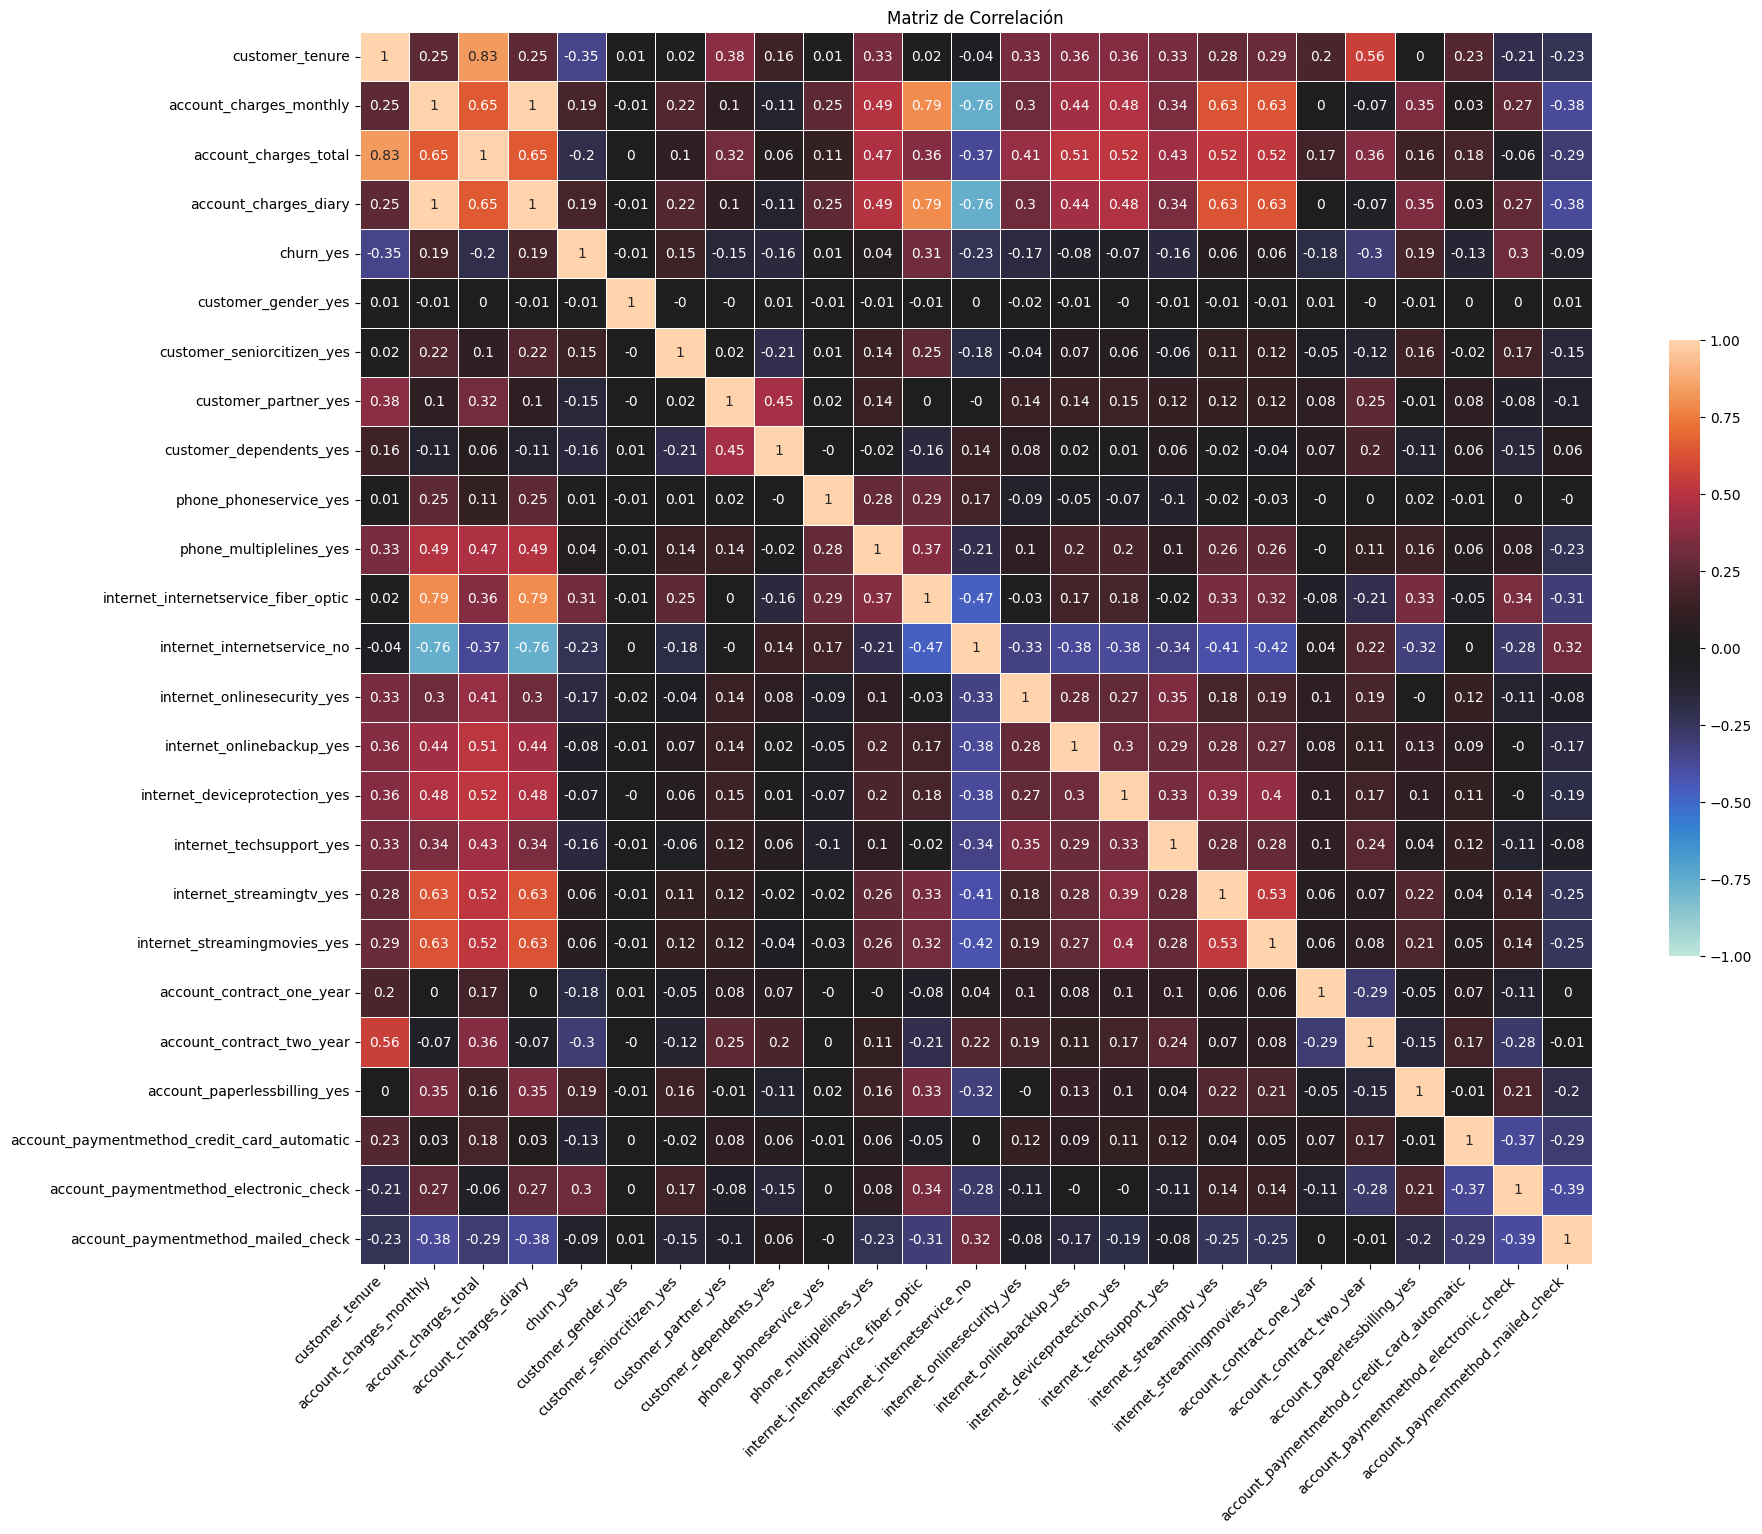

In [56]:
# Matriz de conrrelación.
fig, ax = plt.subplots(figsize=(20,16))

ax = sns.heatmap(np.round(correlacion, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
ax.set_title('Matriz de Correlación')

plt.show()

### Correlación con las varibles relevantes.

In [58]:
# Variable objetivo.
target_var = 'churn_yes'

In [59]:
# Umbral minimo de correlación absoluta para la selecció.
limit = 0.2

In [60]:
# Filtración de varibles
variables_relevantes = correlacion.index[abs(correlacion[target_var]) >= limit].tolist()
variables_relevantes

['customer_tenure',
 'churn_yes',
 'internet_internetservice_fiber_optic',
 'internet_internetservice_no',
 'account_contract_two_year',
 'account_paymentmethod_electronic_check']

In [61]:
# Introducir la variable objetivo en caso de no encontrarse
if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

variables_relevantes

['customer_tenure',
 'churn_yes',
 'internet_internetservice_fiber_optic',
 'internet_internetservice_no',
 'account_contract_two_year',
 'account_paymentmethod_electronic_check']

In [62]:
# Matriz de correlacion con varibles relevantes.
corr_filtrada = correlacion.loc[variables_relevantes, variables_relevantes]
corr_filtrada

,customer_tenure,churn_yes,internet_internetservice_fiber_optic,internet_internetservice_no,account_contract_two_year,account_paymentmethod_electronic_check
customer_tenure,1.000000,-0.354049,0.017930,-0.037529,0.563801,-0.210197
churn_yes,-0.354049,1.000000,0.307463,-0.227578,-0.301552,0.301455
internet_internetservice_fiber_optic,0.017930,0.307463,1.000000,-0.465736,-0.209965,0.335763
internet_internetservice_no,-0.037529,-0.227578,-0.465736,1.000000,0.217542,-0.284608
account_contract_two_year,0.563801,-0.301552,-0.209965,0.217542,1.000000,-0.281147
account_paymentmethod_electronic_check,-0.210197,0.301455,0.335763,-0.284608,-0.281147,1.000000


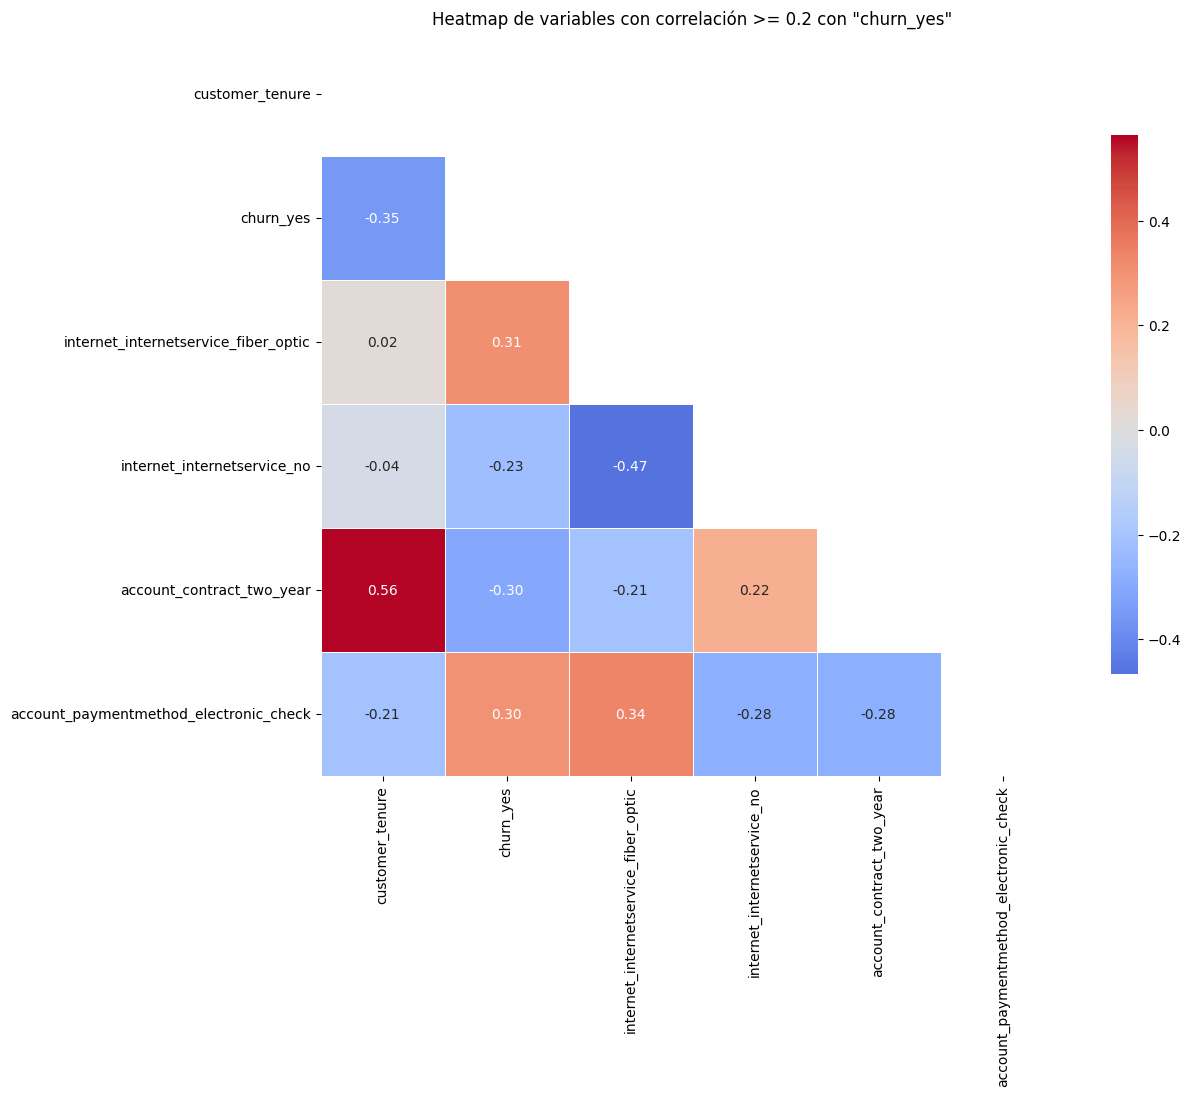

In [63]:
# Máscara para ocultar el triángulo superior de la matriz
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Grafica de la matriz
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limit} con "{target_var}"')
plt.show()

## Análisis de Multicolinealidad.

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#### Variables para el VIF

In [72]:
#
X = datos_enconding.drop(columns=['churn_yes'])
X_const = add_constant(X)

In [73]:
# Conversion del tipo de columnas
X_const = X_const.astype(float)

In [74]:
# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



,Feature,VIF
2,account_charges_monthly,inf
4,account_charges_diary,inf
11,internet_internetservice_fiber_optic,148.510456
12,internet_internetservice_no,104.222375
0,const,73.262152
9,phone_phoneservice_yes,34.895470
18,internet_streamingmovies_yes,24.156974
17,internet_streamingtv_yes,24.081396
3,account_charges_total,10.811976
1,customer_tenure,7.584594


#### Analisis del VIF

| Rango de VIF       | Interpretación                |
| ------------------ | ----------------------------- |
| VIF ≈ 1            | Sin multicolinealidad         |
| 1 < VIF < 5        | Baja (aceptable)              |
| 5 ≤ VIF < 10       | Moderada (vigilar)            |
| VIF ≥ 10           | Alta (¡atención!)             |
| VIF = ∞ (infinito) | Multicolinealidad perfecta ⚠️ |

In [75]:
# VIF ALTA
columnas_vif_alta = vif_data[vif_data['VIF'] >= 10]['Feature'].tolist()
columnas_vif_alta

['const',
 'account_charges_monthly',
 'account_charges_total',
 'account_charges_diary',
 'phone_phoneservice_yes',
 'internet_internetservice_fiber_optic',
 'internet_internetservice_no',
 'internet_streamingtv_yes',
 'internet_streamingmovies_yes']

In [76]:
# VIF MODERADA
columnas_vif_moderada = vif_data[(vif_data['VIF'] >= 5) & (vif_data['VIF'] < 10)]['Feature'].tolist()
columnas_vif_moderada

['customer_tenure',
 'phone_multiplelines_yes',
 'internet_onlinesecurity_yes',
 'internet_onlinebackup_yes',
 'internet_deviceprotection_yes',
 'internet_techsupport_yes']

In [77]:
# VIF BAJA
columnas_vif_baja = vif_data[(vif_data['VIF'] >= 1) & (vif_data['VIF'] < 5)]['Feature'].tolist()
columnas_vif_baja

['customer_gender_yes',
 'customer_seniorcitizen_yes',
 'customer_partner_yes',
 'customer_dependents_yes',
 'account_contract_one_year',
 'account_contract_two_year',
 'account_paperlessbilling_yes',
 'account_paymentmethod_credit_card_automatic',
 'account_paymentmethod_electronic_check',
 'account_paymentmethod_mailed_check']

#### Eliminación de columnas con VIF alta

##### Opción 1

Despues de un analis como 'account_charges_total' se saca con 'account_charges_monthly' y 'customer_tenure'. Entonces, eliminemo
 'account_charges_diary'. Como si no tiene internet_internetservice_fiber_optic' no tiene 'intenet_internetservice_no' eliminemos la última.



In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [90]:
columas_to_drop = ['account_charges_diary', 'internet_internetservice_no','phone_phoneservice_yes']

In [91]:
# Copy por seguridad.
X_const_filtro = X_const.copy()
X_const_filtro.drop(columns=columas_to_drop, inplace=True)

X_const_filtro = X_const_filtro.astype(float)

In [93]:
# Recalcular el VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const_filtro.columns
vif_data["VIF"] = [variance_inflation_factor(X_const_filtro.values, i) for i in range(X_const_filtro.shape[1])]

# Rresultados
display(vif_data.sort_values(by="VIF", ascending=False))

,Feature,VIF
0,const,18.649055
2,account_charges_monthly,18.168780
3,account_charges_total,10.706800
1,customer_tenure,7.548716
9,internet_internetservice_fiber_optic,6.997820
17,account_contract_two_year,2.532131
14,internet_streamingtv_yes,2.188547
15,internet_streamingmovies_yes,2.187888
20,account_paymentmethod_electronic_check,1.967305
21,account_paymentmethod_mailed_check,1.847752


##### Opcion 2

In [94]:
columnas_drop = ['account_charges_total']

In [97]:
# Copy por seguridad.
X_filtro_final = X_const_filtro.copy()
X_filtro_final.drop(columns=columnas_drop, inplace=True)

X_filtro_final = X_filtro_final.astype(float)

In [99]:
# Recalcular el VIF
vif_data_final = pd.DataFrame()
vif_data_final["Feature"] = X_filtro_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_filtro_final.values, i) for i in range(X_filtro_final.shape[1])]

# Resultados ordenados
display(vif_data_final.sort_values(by="VIF", ascending=False))

,Feature,VIF
2,account_charges_monthly,17.283226
0,const,14.674312
8,internet_internetservice_fiber_optic,6.936112
1,customer_tenure,2.826197
16,account_contract_two_year,2.521228
13,internet_streamingtv_yes,2.166619
14,internet_streamingmovies_yes,2.163842
19,account_paymentmethod_electronic_check,1.964004
20,account_paymentmethod_mailed_check,1.825717
12,internet_techsupport_yes,1.712098


## Análisis Dirigido.

In [69]:
ax = px.box(datos_enconding, y='churn_yes', x='account_charges_total', color='churn_yes',
            title='Gasto total × Cancelación', color_discrete_map={ False : 'red', True : 'blue' })

ax.update_layout(title={'x':0.5, 'y':0.9, 'font':{'size': 20, 'family': 'sans-serif'}}, width= 900, height=500)
ax.update_yaxes(title_text='CHURN')
ax.update_xaxes(title_text='GASTO TOTAL')

ax.show()

## Separación de Datos

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [101]:
# Separar features y target
X = datos_enconding.drop('churn_yes', axis=1)
y = datos_enconding['churn_yes']

In [102]:
# Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [103]:
# Normalización de modelo.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

### Creación de Modelos

#### Regresión Logistica.

In [105]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

#### Random Forest

In [107]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

### Evaluación de Modelos

In [106]:
# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7484008528784648
ROC AUC: 0.8456134720014908
Matriz de Confusión:
 [[753 280]
 [ 74 300]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1033
        True       0.52      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407



In [108]:
# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7818052594171997
ROC AUC: 0.8269512504464955
Matriz de Confusión:
 [[870 163]
 [144 230]]
              precision    recall  f1-score   support

       False       0.86      0.84      0.85      1033
        True       0.59      0.61      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407



## Modelo Predictivo

## Analisis de los Modelos.

# Infrome